In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import precision_recall_curve, auc, log_loss

In [8]:
with open("outfile", "w") as outfile:
    outfile.write("\n".join(itemlist))

In [10]:
f = open("outfile", "r")
f.readline().split(',')

['a', 'b', 'c']

In [2]:
def compute_prauc(pred, gt):
  prec, recall, thresh = precision_recall_curve(gt, pred)
  prauc = auc(recall, prec)
  return prauc

def calculate_ctr(gt):
  positive = len([x for x in gt if x == 1])
  ctr = positive/float(len(gt))
  return ctr

def compute_rce(pred, gt):
    cross_entropy = log_loss(gt, pred)
    data_ctr = calculate_ctr(gt)
    print('Data CTR: {}'.format(data_ctr))
    strawman_cross_entropy = log_loss(gt, [data_ctr for _ in range(len(gt))])
    print('Strawman: {}'.format(strawman_cross_entropy))
    print('Cross entropy: {}'.format(cross_entropy))
    return (1.0 - cross_entropy/strawman_cross_entropy)*100.0

In [3]:
import random
import xgboost as xgb
def evaluate_saved_model_random(label, test_size=7000000):
    not_useful_cols = ['Tweet_id', 'User_id', 'User_id_engaging', 'Retweet_engagement_timestamp', 'Like_engagement_timestamp', 'Retweet_with_comment_engagement_timestamp', 'Reply_engagement_timestamp']
    model = pickle.load(open('model_xgb_{}.dat'.format(label), "rb"))
    #start_row = 3000000+random.randint(0, 20000000)
    start_row = 3000000
    print('Parto dalla riga: {}'.format(start_row))
    df_test = pd.read_csv('/home/andreafiandro/NAS/new/training.tsv', sep='\u0001', header=None, skiprows=start_row, nrows=test_size)
    df_test = rsUtils.process_chunk_tsv(df_test)
    df_test = rsUtils.encode_val_string_features(df_test)
    print('Generating features...')
    df_test = rsUtils.generate_features_lgb(df_test)
    dtest = xgb.DMatrix(df_test.drop(not_useful_cols, axis=1), df_test[label+'_engagement_timestamp'].fillna(0).apply(lambda x : 0 if x == 0 else 1))
    #dtest = rsUtils.from_pandas_to_dmatrix(df_test + '_engagement_timestamp', label, not_useful_cols)
    print('Predict...')
    y_pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    prauc = compute_prauc(y_pred, dtest.get_label())
    rce = compute_rce(y_pred, dtest.get_label())
    print('Training for {} --- PRAUC: {} / RCE: {}'.format(label, prauc, rce))
    return y_pred, dtest.get_label()

In [4]:
from recsysUtility import RecSysUtility
rsUtils = RecSysUtility('/home/andreafiandro/NAS/new/training.tsv')

/home/andreafiandro/.local/lib/python3.8/site-packages/dask/array/random.py:25: FutureWarning: dask.array.random.doc_wraps is deprecated and will be removed in a future version
  warnings.warn(


# Training per il like

Reading the input file
Generate features
Adding the user features from ./user_features_final.csv
Split train / test / val
Train: 2430000 / Val: 300000 / Test: 270000
Removing column not useful from training
Start training for label Like...
[0]	eval-RCE:3.72152	train-RCE:3.75396
Multiple eval metrics have been passed: 'train-RCE' will be used for early stopping.

Will train until train-RCE hasn't improved in 10 rounds.
[1]	eval-RCE:7.72001	train-RCE:7.75441
[2]	eval-RCE:11.03206	train-RCE:11.06844
[3]	eval-RCE:13.79234	train-RCE:13.83544
[4]	eval-RCE:16.12800	train-RCE:16.17550
[5]	eval-RCE:18.11167	train-RCE:18.16427
[6]	eval-RCE:19.79761	train-RCE:19.85541
[7]	eval-RCE:21.23432	train-RCE:21.29465
[8]	eval-RCE:22.47984	train-RCE:22.54706
[9]	eval-RCE:23.54701	train-RCE:23.61796
[10]	eval-RCE:24.49024	train-RCE:24.56573
[11]	eval-RCE:25.33635	train-RCE:25.41775
[12]	eval-RCE:26.05097	train-RCE:26.13818
[13]	eval-RCE:26.67529	train-RCE:26.77261
[14]	eval-RCE:27.23258	train-RCE:27.33268
[

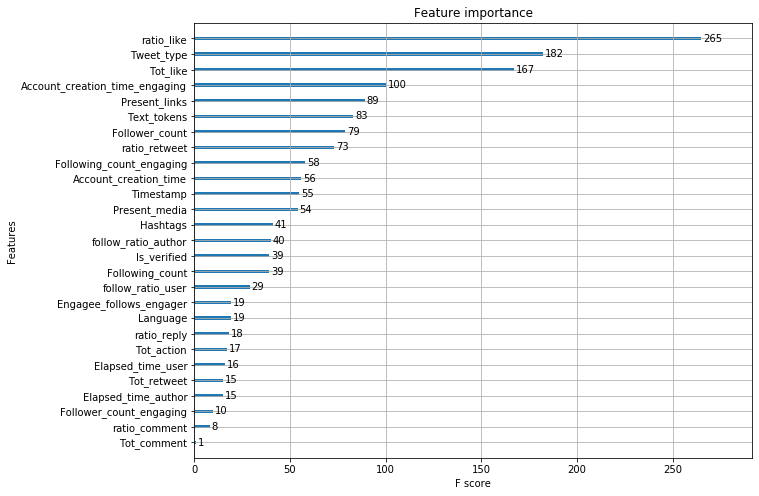

In [10]:
estimator = rsUtils.xgboost_training_chunk('Like')

## Uso il modello su altri dati, estratti dal fondo del dataset

In [5]:
y_pred, labels = evaluate_saved_model_random('Like')

Parto dalla riga: 3000000
Generating features...
Adding the user features from ./user_features_final.csv
Predict...
Data CTR: 0.43712757142857145
Strawman: 0.6852203287758034
Cross entropy: 0.4720888685106268
Training for Like --- PRAUC: 0.8082046143437119 / RCE: 31.10407723103482


# Training per il reply

Reading the input file
Generate features
Adding the user features from ./user_features_final.csv
Split train / test / val
Train: 2430000 / Val: 300000 / Test: 270000
Removing column not useful from training
Start training for label Reply...
[0]	eval-RCE:-394.62910	train-RCE:-396.07671
Multiple eval metrics have been passed: 'train-RCE' will be used for early stopping.

Will train until train-RCE hasn't improved in 10 rounds.
[1]	eval-RCE:-335.63250	train-RCE:-336.86218
[2]	eval-RCE:-286.48465	train-RCE:-287.52184
[3]	eval-RCE:-244.96632	train-RCE:-245.84051
[4]	eval-RCE:-209.55242	train-RCE:-210.28888
[5]	eval-RCE:-179.09349	train-RCE:-179.70779
[6]	eval-RCE:-152.69595	train-RCE:-153.20650
[7]	eval-RCE:-129.72242	train-RCE:-130.13583
[8]	eval-RCE:-109.60640	train-RCE:-109.94227
[9]	eval-RCE:-91.94343	train-RCE:-92.20760
[10]	eval-RCE:-76.39827	train-RCE:-76.59097
[11]	eval-RCE:-62.65634	train-RCE:-62.78386
[12]	eval-RCE:-50.48504	train-RCE:-50.55459
[13]	eval-RCE:-39.67764	train-RCE:-3

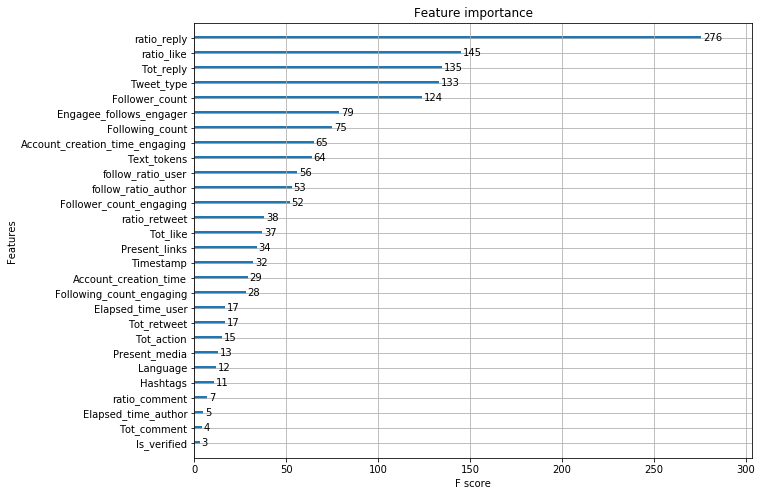

In [12]:
estimator = rsUtils.xgboost_training_chunk('Reply')

## Uso il modello su altri dati, estratti dal fondo del dataset

In [6]:
y_pred, labels = evaluate_saved_model_random('Reply')

Parto dalla riga: 3000000
Generating features...
Adding the user features from ./user_features_final.csv
Predict...
Data CTR: 0.026551857142857144
Strawman: 0.1225437393549464
Cross entropy: 0.07779864585720375
Training for Reply --- PRAUC: 0.4826409343008635 / RCE: 36.51356954935009


# Training per il retweet

Reading the input file
Generate features
Adding the user features from ./user_features_final.csv
Split train / test / val
Train: 2430000 / Val: 300000 / Test: 270000
Removing column not useful from training
Start training for label Retweet...
[0]	eval-RCE:-78.16255	train-RCE:-77.92145
Multiple eval metrics have been passed: 'train-RCE' will be used for early stopping.

Will train until train-RCE hasn't improved in 10 rounds.
[1]	eval-RCE:-61.30264	train-RCE:-61.08576
[2]	eval-RCE:-47.26640	train-RCE:-47.06753
[3]	eval-RCE:-35.43141	train-RCE:-35.24986
[4]	eval-RCE:-25.34938	train-RCE:-25.17932
[5]	eval-RCE:-16.70298	train-RCE:-16.53842
[6]	eval-RCE:-9.23230	train-RCE:-9.07504
[7]	eval-RCE:-2.74821	train-RCE:-2.59550
[8]	eval-RCE:2.91030	train-RCE:3.05943
[9]	eval-RCE:7.86037	train-RCE:8.00642
[10]	eval-RCE:12.22045	train-RCE:12.36854
[11]	eval-RCE:16.06249	train-RCE:16.20501
[12]	eval-RCE:19.45664	train-RCE:19.59780
[13]	eval-RCE:22.46150	train-RCE:22.60523
[14]	eval-RCE:25.14386	train

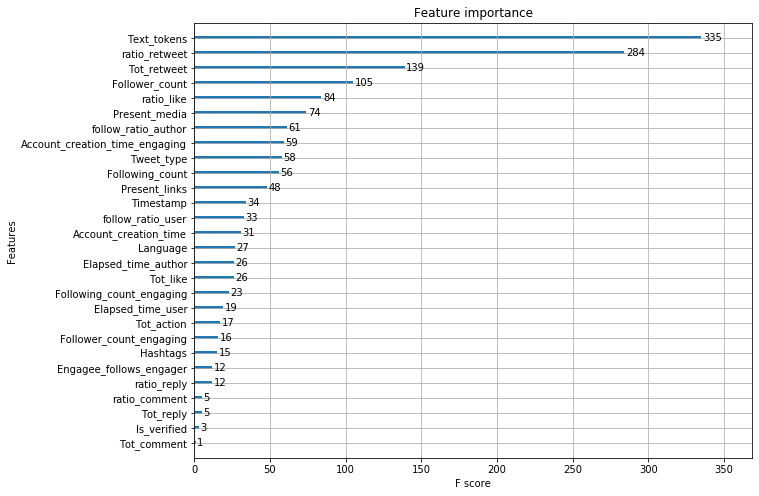

In [14]:
estimator = rsUtils.xgboost_training_chunk('Retweet')

## Uso il modello su altri dati, estratti dal fondo del dataset

In [ ]:
y_pred, labels = evaluate_saved_model_random('Retweet')

Parto dalla riga: 3000000


# Training per il retweet with comment

Reading the input file
Generate features
Adding the user features from ./user_features_final.csv
Split train / test / val
Train: 2430000 / Val: 300000 / Test: 270000
Removing column not useful from training
Start training for label Retweet_with_comment...
[0]	eval-RCE:-1293.87922	train-RCE:-1243.38971
Multiple eval metrics have been passed: 'train-RCE' will be used for early stopping.

Will train until train-RCE hasn't improved in 10 rounds.
[1]	eval-RCE:-1117.52103	train-RCE:-1073.47180
[2]	eval-RCE:-970.48894	train-RCE:-931.81512
[3]	eval-RCE:-846.22432	train-RCE:-812.09874
[4]	eval-RCE:-740.15583	train-RCE:-709.91554
[5]	eval-RCE:-648.83072	train-RCE:-621.92912
[6]	eval-RCE:-569.65668	train-RCE:-545.66259
[7]	eval-RCE:-500.64986	train-RCE:-479.19018
[8]	eval-RCE:-440.20286	train-RCE:-420.95901
[9]	eval-RCE:-387.08542	train-RCE:-369.79082
[10]	eval-RCE:-340.22836	train-RCE:-324.65107
[11]	eval-RCE:-298.77362	train-RCE:-284.71468
[12]	eval-RCE:-262.00328	train-RCE:-249.30456
[13]	eval

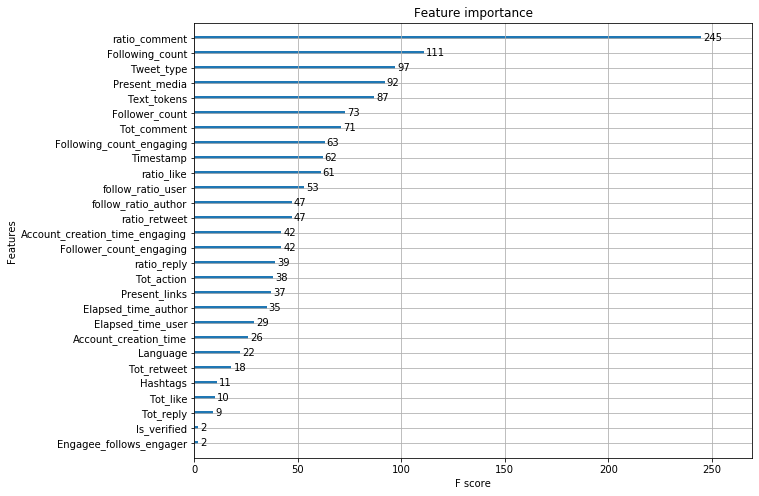

In [16]:
estimator = rsUtils.xgboost_training_chunk('Retweet_with_comment')

## Uso il modello su altri dati, estratti dal fondo del dataset

In [ ]:
y_pred, labels = evaluate_saved_model_random('Retweet_with_comment')